<img src="https://avatars0.githubusercontent.com/u/33459977?s=80&v=4" align="left"/>

---------------------------------------------------------------------------
About
=====

- **ARJUN MOHNOT**
- E17CSE102
- EB04
- Mobile: +91-7733993964
- [Website](https://arjun009.github.io)
- [WhatsApp](https://wa.me/917733993964?text=Hey%20Arjun%20Mohnot,%20I%27m%20contacting%20you%20from%20your%20Jupyter%20Notebook,%20A.I.-M.L.)
- [PlayStore](https://play.google.com/store/apps/developer?id=ARJUN+MOHNOT)

---------------------------------------------------------------------------

# Importing Libraries

In [3]:
#For importing pandas,numpy,matplotlib,Dictionary counter
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import IPython.display

# For Metadata from Image
from hachoir.parser import createParser
from hachoir.metadata import extractMetadata
from PIL import Image

#For Audio
import wave
import sys
from pygame import mixer
from IPython.display import Audio

#For Video
from IPython.display import Video

#For Word Cloud
import os
from wordcloud import WordCloud

#For Bubble Cloud
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import *

#For zip files
import zipfile

#For Pdf Files
import PyPDF2

#For Json
import json

#Reading Dicom Image
from skimage import io
import pydicom
from pydicom.data import get_testdata_files

In [4]:
#Opening the excel(.xlsx) file
openFile=pd.read_excel("Result.xlsx")

In [5]:
#File shape (Rows*Columns)
openFile.shape

(21, 7)

In [6]:
#Total no of cells
openFile.size

147

In [7]:
#All columns inside the file
openFile.keys()

Index(['Timing', 'Day', 'Batch', 'Code', 'LTP', 'Venue', 'Faculty'], dtype='object')

# Table

In [8]:
# Printing pandas dataframe
openFile

,Timing,Day,Batch,Code,LTP,Venue,Faculty
0,0830 - 0925,Monday,All,Big Data--ECSE301L,Lecture,010NCC,Rishav
1,1040 - 1135,Monday,all,Info.Sec.--ECSE353L,Lecture,010NCC,Suchi
2,1140 - 1235,Monday,All,Automata--ECSE305L,Lecture,010NCC,Shakti
3,1540 - 1635,Monday,OE,Linear- EMat 341L,Lecture,102NLH,Neelam
4,0830 - 0925,Tuesday,All,Automata--ECSE305L,Lecture,010NCC,Shakti
5,1140 - 1235,Tuesday,All,A.I.--ECSE303L,Lecture,010NCC,Sridhar
6,1640 - 1735,Tuesday,OE,Linear- EMat 341L,Lecture,102NLH,Neelam
7,0830 - 0925,Wednesday,All,A.I.--ECSE303L,Lecture,010NCC,Sridhar
8,0930 - 1025,Wednesday,All,Big Data--ECSE301L,Lecture,010NCC,Rishav
9,1140 - 1235,Wednesday,B4,Automata--ECSE305L,Tut,311NCA,Shakti


In [9]:
ltp=openFile['LTP']
ltpDict=dict(Counter(ltp))
ltpDict

{'Lecture': 14, 'Tut': 1, 'Lab': 6}

# Line Graph

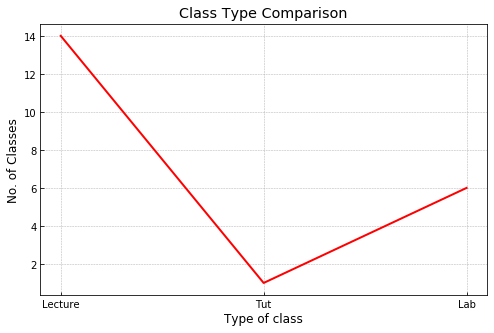

In [29]:
# Comparison of Lecture, Tutorial and Lab on the basis of no. of classes.

plt.ylabel('No. of Classes')
plt.xlabel('Type of class')
plt.title('Class Type Comparison')
plt.plot(ltpDict.keys(),ltpDict.values(),color='r')
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (8, 5),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})
plt.show()

In [11]:
day=openFile['Day']
day=dict(Counter(day))
day

{'Monday': 4, 'Tuesday': 3, 'Wednesday': 6, 'Thursday': 4, 'Friday': 4}

# Bar Graph

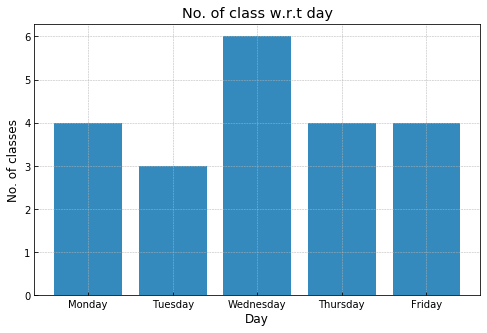

In [12]:
# No. of classes in entire week with respect to time

plt.ylabel("No. of classes")
plt.xlabel("Day")
plt.title("No. of class w.r.t day")
plt.bar(day.keys(),day.values())
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (7, 6),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})
plt.show()

In [13]:
# No. of Classes teachers are taking
faculty=openFile["Faculty"]
facultyDict=dict(Counter(faculty))
facultyDict

{'Rishav': 5, 'Suchi': 2, 'Shakti': 4, 'Neelam': 3, 'Sridhar': 5, 'Kuldeep': 2}

# Pie Chart Graph

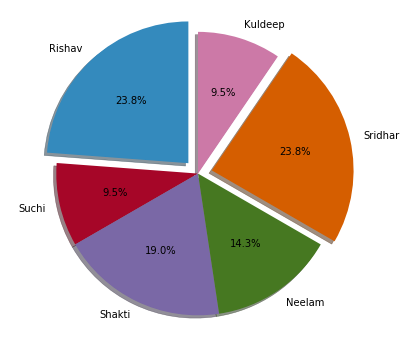

In [14]:
#Probability that you will find your favorite teacher
totalNoOfClasses=sum(facultyDict.values())
teachersClassProbability=[i/totalNoOfClasses for i in facultyDict.values()]

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = facultyDict.keys()
sizes = teachersClassProbability
explode = (0.1, 0, 0, 0,0.1,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (5, 7),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})
plt.show()


# Scatter Plot

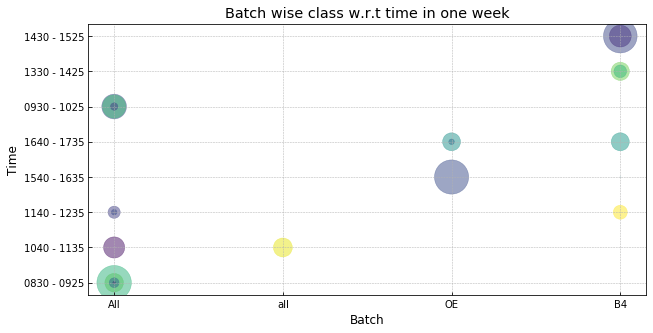

In [31]:
N = 21
colors = np.random.rand(N)
area = (40 * np.random.rand(N))**2  # 0 to 15 point radii

batch=openFile["Batch"]
batchElect=[]

times=list(openFile["Timing"])

for i in range(len(batch)):
    batchElect.append(batch[i])
    
plt.ylabel("Time")
plt.xlabel("Batch")
plt.title("Batch wise class w.r.t time in one week")    
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (10, 5),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})   

plt.scatter(batchElect,times, s=area, c=colors, alpha=0.5)
plt.show()


# Histogram chart

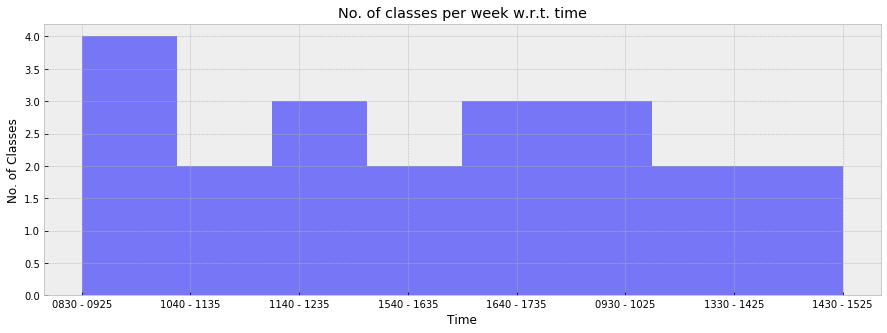

In [33]:
time=list(openFile['Timing'])

length=len(set(time))
num_bins = length
plt.style.use("bmh")
plt.ylabel("No. of Classes")
plt.xlabel("Time")
plt.title("No. of classes per week w.r.t. time")
plt.rcParams.update({"figure.figsize" : (15, 5),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"}) 
n, bins, patches = plt.hist(time, num_bins, facecolor='blue', alpha=0.5)
plt.show()

# Audio Player and Spectogram

c:\python36\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning:

Numeric-style type codes are deprecated and will result in an error in the future.

c:\python36\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning:

The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead



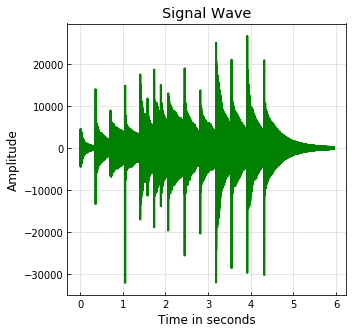

In [17]:
#Reading .wav file and plotting graph with amplitude and time

mixer.init()
mixer.music.load("one.wav")
mixer.music.play()

spf = wave.open('one.wav','r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')
fs = spf.getframerate()

#If Stereo
if spf.getnchannels() == 2:
    sys.exit(0)


Time=np.linspace(0, len(signal)/fs, num=len(signal))
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (5, 5),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})
plt.figure(1)
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.title('Signal Wave')
plt.plot(Time,signal,color='g')


plt.show()
IPython.display.Audio("one.wav")

# Video Player

In [18]:
#For Video
Video("Out.mp4")


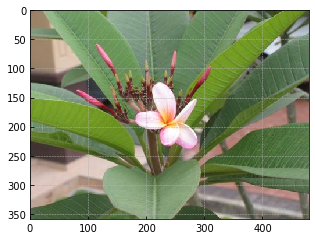

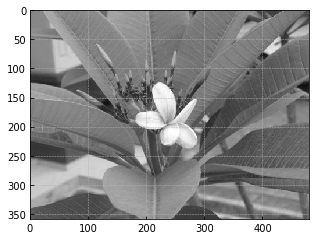

[warn] [/exif/content/ifd[0]] [Autofix] Fix parser error: stop parser, found unparsed segment: start 1424, length 96
[warn] [/exif/content] [Autofix] Fix parser error: stop parser, found unparsed segment: start 12752, length 3776, found unparsed segment: start 60112, length 1488


Metadata:
- Image width: 480 pixels
- Image height: 360 pixels
- Image orientation: Horizontal (normal)
- Bits/pixel: 24
- Pixel format: YCbCr
- Image DPI width: 72 DPI
- Image DPI height: 72 DPI
- Creation date: 2003-12-14 12:01:44
- Camera aperture: 2.97
- Camera focal: 4.9
- Camera exposure: 1/500
- Camera model: Canon PowerShot S40
- Camera manufacturer: Canon
- Compression: JPEG (Baseline)
- Thumbnail size: 5448 bytes
- EXIF version: 0220
- Date-time original: 2003-12-14 12:01:44
- Date-time digitized: 2003-12-14 12:01:44
- Compressed bits per pixel: 5
- Shutter speed: 8.97
- Aperture: 4.66
- Exposure bias: 0
- Focal length: 21.3
- Flashpix version: 0100
- Focal plane width: 8.11e+03
- Focal plane height: 8.11e+03
- Comment: JPEG quality: 75%
- Format version: JFIF 1.01
- MIME type: image/jpeg
- Endianness: Big endian



In [19]:
#For Image
from PIL import Image

fname = 'pic.jpg'
image = Image.open(fname)
arr = np.asarray(image)
plt.imshow(arr)
plt.show()


fname = 'pic.jpg'
image = Image.open(fname).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

filename = "pic.jpg"
parser = createParser(filename)
metadata = extractMetadata(parser)
linestring=''
for line in metadata.exportPlaintext():
    linestring+=line+'\n'
print(linestring)

# Word Cloud

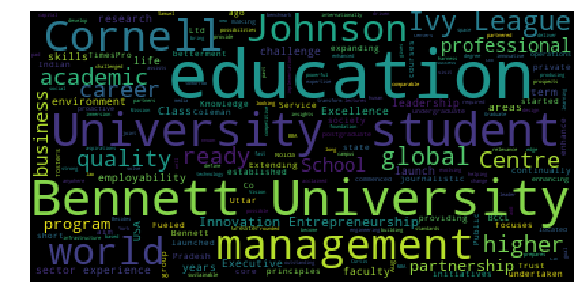

In [34]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.getcwd()

# Read the whole text.
text = open(os.path.join(d, 'aboutBennettUniversity.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:

wordcloud = WordCloud(max_font_size=50).generate(text)
plt.figure()
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (10, 10),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})
plt.imshow(wordcloud, interpolation="nearest")
plt.axis("off")
plt.show()

# Bubble Graph (Custom-Made)

In [ ]:
file=open("ml.txt")
l=[]
con=['and','it','It','are','Are','with','With','that','That','its','Its','an','An','on','On','as','As', 'And', 'the', 'The', 'yet', 'Yet', 'is', 'Is', 'a', 'A',  ',', '.', 'because', 'Because', 'while', 'While', 'or', 'Or', 'so', 'So', '!', 'to', 'To', 'of', 'Of', 'in', 'In', 'from', 'From', 'can', 'Can', 'for', 'For']

for i in file:
    for j in i.split():
        if j not in con:
            j=j.split(".")[0]
            l.append(j.capitalize())

d=dict(Counter(l).most_common())
x_data=2*[i for i in range(1,8)]
#print(shuffle(x_data))
y_data=list(d.values())[:15]

z_data=list(d.keys())[:15]


annotations = [
    dict(
        x=x, 
        y=y,
        text= z,
        showarrow=False,
        xanchor='center',  # Position of text relative to x axis (left/right/center)
        yanchor='middle',  # Position of text relative to y axis (top/bottom/middle)
    ) for x, y, z in zip(x_data, y_data, z_data)
]


trace0 = go.Scatter(
    x=x_data,
    y=y_data,
   
    hoverinfo='y+z',
    mode='markers',
    marker=dict(
        color=3*['rgb(93, 164, 214)', 'rgb(255, 144, 14)',  'rgb(44, 160, 101)', 'rgb(255, 65, 54)','rgb(30, 14, 214)'],
        size=5*[100, 100, 100]
    )
)

data = [trace0]

layout = go.Layout(annotations=annotations, title="Bubble Graph",
            height=500,xaxis = go.layout.XAxis(
        title=" X-axis --->",        
        tickmode = 'linear',
        tick0 = 0.5,
        dtick = 0.75
    ),yaxis=go.layout.YAxis(
        title="No. of occurences in text --->",        
        tickmode = 'linear',
        tick0 = 2,
        dtick = 2
    ))
py.iplot(go.Figure(data=data, layout=layout),filename='Custom-Created-Bubble-Graph')



# Reading Zip Files

In [21]:

# Extract the contents into the temporary directory we created earlier
with zipfile.ZipFile(os.getcwd()+"\\New folder.zip", 'r') as zip_ref:
    zip_ref.extractall(os.getcwd())
paths=os.getcwd()+"\\New folder"
files=[]
for f in os.listdir(paths):
    files.append(f)
    print(f)

ai.txt
ml.txt
rnn.txt


In [22]:
print("Reading all the files that were extracted","\n")
count=1
for i in files:
    print(count,"-> ",i,"\n")
    a=open(paths+"\\"+i)
    print(list(a)[0])
    count+=1
    

Reading all the files that were extracted 

1 ->  ai.txt 

Some machine learning methods

2 ->  ml.txt 

Machine learning is an application of artificial intelligence (AI) that provides systems the ability to automatically learn and improve from experience without being explicitly programmed. Machine learning focuses on the development of computer programs that can access data and use it learn for themselves.

3 ->  rnn.txt 

Semi-supervised machine learning algorithms fall somewhere in between supervised and unsupervised learning, since they use both labeled and unlabeled data for training – typically a small amount of labeled data and a large amount of unlabeled data. The systems that use this method are able to considerably improve learning accuracy. Usually, semi-supervised learning is chosen when the acquired labeled data requires skilled and relevant resources in order to train it / learn from it. Otherwise, acquiringunlabeled data generally doesn’t require additional resources.


# Pdf File 

In [23]:
# creating a pdf file object 
print("--> Reading Pdf file")
pdfFileObj = open('sample.pdf', 'rb') 
  
# creating a pdf reader object 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
  
# printing number of pages in pdf file 
print("--> Total no. of pages ",pdfReader.numPages,"\n") 
  
# creating a page object
for i in range((pdfReader.numPages)):
    print("Page Number - ",i+1,"\n")           
    pageObj = pdfReader.getPage(i) 
  
    # extracting text from page 
    print(pageObj.extractText())
    print("\n")
  
# closing the pdf file object 
pdfFileObj.close() 

--> Reading Pdf file
--> Total no. of pages  2 

Page Number -  1 

 A Simple PDF File  This is a small demonstration .pdf file -  just for use in the Virtual Mechanics tutorials. More text. And more  text. And more text. And more text. And more text.  And more text. And more text. And more text. And more text. And more  text. And more text. Boring, zzzzz. And more text. And more text. And  more text. And more text. And more text. And more text. And more text.  And more text. And more text.  And more text. And more text. And more text. And more text. And more  text. And more text. And more text. Even more. Continued on page 2 ...


Page Number -  2 

 Simple PDF File 2  ...continued from page 1. Yet more text. And more text. And more text.  And more text. And more text. And more text. And more text. And more  text. Oh, how boring typing this stuff. But not as boring as watching  paint dry. And more text. And more text. And more text. And more text.  Boring.  More, a little more text. T

# Reading SQL File

In [24]:
fd = open('sQl.sql', 'r')
sqlFile = fd.read()
a=[]
print(sqlFile)
fd.close()



--
-- Database: `samplevideo_db`
--

-- --------------------------------------------------------

--
-- Table structure for table `user_details`
--

CREATE TABLE IF NOT EXISTS `user_details` (
  `user_id` int(11) NOT NULL AUTO_INCREMENT,
  `username` varchar(255) DEFAULT NULL,
  `first_name` varchar(50) DEFAULT NULL,
  `last_name` varchar(50) DEFAULT NULL,
  `gender` varchar(10) DEFAULT NULL,
  `password` varchar(50) DEFAULT NULL,
  `status` tinyint(10) DEFAULT NULL,
  PRIMARY KEY (`user_id`)
) ENGINE=MyISAM  DEFAULT CHARSET=latin1 AUTO_INCREMENT=10001 ;

--
-- Dumping data for table `user_details`
--

INSERT INTO `user_details` (`user_id`, `username`, `first_name`, `last_name`, `gender`, `password`, `status`) VALUES
(1, 'rogers63', 'david', 'john', 'Female', 'e6a33eee180b07e563d74fee8c2c66b8', 1),
(2, 'mike28', 'rogers', 'paul', 'Male', '2e7dc6b8a1598f4f75c3eaa47958ee2f', 1),
(3, 'rivera92', 'david', 'john', 'Male', '1c3a8e03f448d211904161a6f5849b68', 1),
(4, 'ross95', 'maria', 'sande

# Reading Dicom image data

In [25]:
ds = pydicom.dcmread("IM-0001-0002.dcm")
print(ds)

(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.12.2.1107.5.1.4.54023.30000005032916373504600004749
(0008, 0020) Study Date                          DA: '20050329'
(0008, 0021) Series Date                         DA: '20050329'
(0008, 0022) Acquisition Date                    DA: '20050329'
(0008, 0023) Content Date                        DA: '20050329'
(0008, 0030) Study Time                          TM: '142530.125000'
(0008, 0031) Series Time                         TM: '144801.203000'
(0008, 0032) Acquisition Time                    TM: '143840.611848'
(0008, 0033) Content Time                        TM: '143840.611848'
(0008, 0050) Accession Number                    SH: '2386679\x00'
(0008, 0060) Modality                            CS: 'CT'
(0008, 0070) Manufacturer                        LO: 'SIEMENS\x

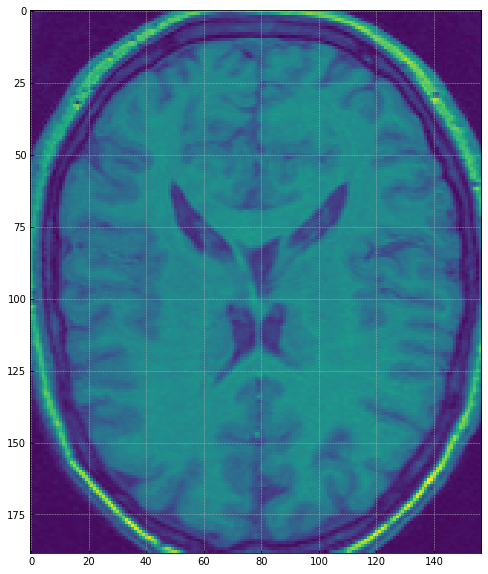

In [49]:
struct_arr = io.imread("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/attention-mri.tif")
plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (10, 10),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})
plt.imshow(struct_arr.T[34])

# Creating and reading json file

In [26]:
data = {}
data['people'] = []
data['people'].append({
    'name': 'Arjun Mohnot',
    'website': 'arjun009.github.io',
    'from': 'Roorkee'
})
data['people'].append({
    'name': 'Larry',
    'website': 'google.com',
    'from': 'Michigan'
})
data['people'].append({
    'name': 'Tim',
    'website': 'apple.com',
    'from': 'Alabama'
})

with open('data.txt', 'w') as outfile:
    json.dump(data, outfile)

In [27]:
with open('data.txt') as json_file:
    data = json.load(json_file)
    for p in data['people']:
        print('Name: ' + p['name'])
        print('Website: ' + p['website'])
        print('From: ' + p['from'])
        print('')

Name: Arjun Mohnot
Website: arjun009.github.io
From: Roorkee

Name: Larry
Website: google.com
From: Michigan

Name: Tim
Website: apple.com
From: Alabama

